In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import json
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
# 1. LOAD & PREPROCESSING DATA
def load_data():
    # Nanti Akan Load Data dari Database
    articles_df = pd.read_csv('data/articles_202505071725.csv')
    likes_df = pd.read_csv('data/article_likes_202505071726.csv')
    comments_df = pd.read_csv('data/article_comments_202505071727.csv')
    return articles_df, likes_df, comments_df


In [4]:
def preprocess_data(articles_df, likes_df, comments_df):
    
      # Ensure all IDs are strings
    articles_df['id'] = articles_df['id'].astype(str)
    likes_df['article_id'] = likes_df['article_id'].astype(str)
    comments_df['article_id'] = comments_df['article_id'].astype(str)
    
    # Calculate likes per article
    article_likes = likes_df.groupby('article_id').size().reset_index(name='likes_count')
    
    # Calculate comments per article
    article_comments = comments_df.groupby('article_id').size().reset_index(name='comments_count')
    
    # Combine data with articles
    articles_enriched = articles_df.copy()
    articles_enriched['id'] = articles_enriched['id'].astype(str)
    
    # Add likes count
    articles_enriched = articles_enriched.merge(article_likes, left_on='id', right_on='article_id', how='left')
    articles_enriched['likes_count'] = articles_enriched['likes_count'].fillna(0)
    
    # Add comments count
    articles_enriched = articles_enriched.merge(article_comments, left_on='id', right_on='article_id', how='left')
    articles_enriched['comments_count'] = articles_enriched['comments_count'].fillna(0)
    
    # Clean up
    articles_enriched = articles_enriched.drop(['article_id_x', 'article_id_y'], axis=1, errors='ignore')
    
    # Extract features from article title using Text Processing
    # Combine title, province, and city for text-based features
    articles_enriched['text_features'] = articles_enriched['title'] + ' ' + articles_enriched['province'] + ' ' + articles_enriched['city']
    
    # Add engagement score
    articles_enriched['engagement_score'] = articles_enriched['likes_count'] + (2 * articles_enriched['comments_count'])
    
    return articles_enriched

In [5]:
# Memuat data
articles, likes, comments = load_data()

In [6]:
# Ambil kolom-kolom yang diinginkan dari DataFrame
articles_df = articles[['id', 'title', 'slug', 'province', 'city', 'active', 'user_id']]


In [7]:
# Ambil kolom-kolom yang diinginkan dari DataFrame
comments_df = comments[['id', 'article_id', 'user_id']]

In [8]:
# Ambil kolom-kolom yang diinginkan dari DataFrame
likes_df = likes[['id', 'article_id', 'user_id']]

In [9]:
# Proses data
articles_enriched = preprocess_data(articles_df, likes_df, comments_df)

C:\Users\MID-020\AppData\Local\Temp\ipykernel_16512\1595832517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['id'] = articles_df['id'].astype(str)
C:\Users\MID-020\AppData\Local\Temp\ipykernel_16512\1595832517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likes_df['article_id'] = likes_df['article_id'].astype(str)
C:\Users\MID-020\AppData\Local\Temp\ipykernel_16512\1595832517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [10]:
articles_enriched

,id,title,slug,province,city,active,user_id,likes_count,comments_count,text_features,engagement_score
0,1,Might group board positive campaign per partic...,arm-happy-book-win,North Carolina,Estradaborough,True,d50e8d4f-871d-4ef9-9a7f-d360180588a3,2,1,Might group board positive campaign per partic...,4
1,2,Build someone around eight past chance.,nothing-same-hand,Idaho,Reidberg,True,ba2372f3-5250-402a-ab7d-4012b924c020,2,1,Build someone around eight past chance. Idaho ...,4
2,3,Realize strong simply attorney.,data-skin-from,Tennessee,North Ronaldberg,True,d4b08900-100d-426f-8dff-5f8ddc134485,2,1,Realize strong simply attorney. Tennessee Nort...,4
3,4,Allow million school.,study-view-wish,Oregon,West Brandonview,True,0f9cbb49-8e26-4f8b-9306-d810710feb87,2,1,Allow million school. Oregon West Brandonview,4
4,5,Push stage need officer process.,notice-attack-kid,Delaware,West Cynthiaview,True,755c75c2-2642-471a-93d1-13d7920d5530,2,1,Push stage need officer process. Delaware West...,4
...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Again above box.,american-commercial,Utah,North Barbarastad,True,57480c0a-91c2-4067-9e5f-bac77e2fc557,2,1,Again above box. Utah North Barbarastad,4
3996,3997,Likely bit they into once.,student-site-line,Michigan,Jackport,True,28634318-d553-4ca7-8d85-c76012a9ea1c,2,1,Likely bit they into once. Michigan Jackport,4
3997,3998,Condition cut too somebody back couple approac...,old-response-late,Oklahoma,Matthewburgh,True,947aeccc-feca-4c40-af8c-683d019f7539,2,1,Condition cut too somebody back couple approac...,4
3998,3999,Trial evening indicate follow put yourself spe...,force-name-husband,Pennsylvania,Port Shelleyport,True,52f865af-89ed-450b-8c25-8396a628dfd3,2,1,Trial evening indicate follow put yourself spe...,4


In [11]:
def prepare_interaction_data(articles_df, likes_df, comments_df):
    
    # Process likes data
    likes = likes_df.copy()
    likes['interaction_type'] = 'like'
    likes['interaction_value'] = 1.0
    
    # Process comments data
    comments = comments_df.copy()
    comments['interaction_type'] = 'comment'
    comments['interaction_value'] = 2.0  # Comments weighted higher than likes
    
    # Combine interactions
    interactions = pd.concat([
        likes[['user_id', 'article_id', 'interaction_type', 'interaction_value']],
        comments[['user_id', 'article_id', 'interaction_type', 'interaction_value']]
    ])
    
    # Group by user-article pairs and sum interaction values
    interaction_scores = interactions.groupby(['user_id', 'article_id'])['interaction_value'].sum().reset_index(name='interaction_score')
    
    # Normalize scores (optional)
    max_score = interaction_scores['interaction_score'].max()
    interaction_scores['interaction_score'] = interaction_scores['interaction_score'] / max_score
    
    return interaction_scores


In [12]:

class TFCollaborativeRecommender:
    def __init__(self):
        self.model = None
        self.user_encoder = LabelEncoder()
        self.article_encoder = LabelEncoder()
        self.user_mapping = {}
        self.article_mapping = {}
        self.reverse_user_mapping = {}
        self.reverse_article_mapping = {}
        self.user_factors = None
        self.article_factors = None
        self.global_bias = None
        self.user_biases = None
        self.article_biases = None
        self.model_path = 'models/tf_collaborative_recommender'
        
    def _create_model(self, num_users, num_articles, embedding_size=32):
        """Create the collaborative filtering model with embeddings"""
        
        # Input layers
        user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
        article_input = tf.keras.layers.Input(shape=(1,), name='article_input')
        
        # Embedding layers
        user_embedding = tf.keras.layers.Embedding(
            num_users, embedding_size, name='user_embedding')(user_input)
        article_embedding = tf.keras.layers.Embedding(
            num_articles, embedding_size, name='article_embedding')(article_input)
        
        # Bias layers
        user_bias = tf.keras.layers.Embedding(
            num_users, 1, name='user_bias')(user_input)
        article_bias = tf.keras.layers.Embedding(
            num_articles, 1, name='article_bias')(article_input)
        
        # Reshape embeddings
        user_vecs = tf.keras.layers.Flatten()(user_embedding)
        article_vecs = tf.keras.layers.Flatten()(article_embedding)
        user_bias = tf.keras.layers.Flatten()(user_bias)
        article_bias = tf.keras.layers.Flatten()(article_bias)
        
        # Create interaction layer (dot product)
        dot_product = tf.keras.layers.Dot(axes=1)([user_vecs, article_vecs])
        
        # Add biases to dot product
        global_bias = tf.keras.layers.Dense(1, use_bias=False, kernel_initializer='zeros', name='global_bias')(
            tf.keras.layers.Lambda(lambda x: x*0+1)(user_input))
        
        # Combine layers
        output = tf.keras.layers.Add()([dot_product, user_bias, article_bias, global_bias])
        
        # Build and compile the model
        model = tf.keras.Model(inputs=[user_input, article_input], outputs=output)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='mean_squared_error'
        )
        
        return model
    
    def fit(self, interactions_df, embedding_size=32, epochs=20, batch_size=64, validation_split=0.1):
        """
        Train the collaborative filtering model
        
        Args:
            interactions_df: DataFrame with user_id, article_id, and interaction_score columns
            embedding_size: Size of the embedding vectors
            epochs: Number of training epochs
            batch_size: Training batch size
            validation_split: Fraction of data to use for validation
            
        Returns:
            self
        """
        # Encode user and article IDs
        self.user_encoder.fit(interactions_df['user_id'].unique())
        self.article_encoder.fit(interactions_df['article_id'].unique())
        
        # Create mappings
        self.user_mapping = dict(zip(
            interactions_df['user_id'].unique(), 
            self.user_encoder.transform(interactions_df['user_id'].unique())
        ))
        self.article_mapping = dict(zip(
            interactions_df['article_id'].unique(), 
            self.article_encoder.transform(interactions_df['article_id'].unique())
        ))
        
        # Create reverse mappings
        self.reverse_user_mapping = {v: k for k, v in self.user_mapping.items()}
        self.reverse_article_mapping = {v: k for k, v in self.article_mapping.items()}
        
        # Encode the training data
        user_indices = self.user_encoder.transform(interactions_df['user_id'])
        article_indices = self.article_encoder.transform(interactions_df['article_id'])
        interaction_scores = interactions_df['interaction_score'].values
        
        # Create the model
        num_users = len(self.user_mapping)
        num_articles = len(self.article_mapping)
        self.model = self._create_model(num_users, num_articles, embedding_size)
        
        # Train the model
        history = self.model.fit(
            [user_indices, article_indices],
            interaction_scores,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            verbose=1
        )
        
        # Extract learned embeddings
        user_embedding_layer = self.model.get_layer('user_embedding')
        article_embedding_layer = self.model.get_layer('article_embedding')
        user_bias_layer = self.model.get_layer('user_bias')
        article_bias_layer = self.model.get_layer('article_bias')
        global_bias_layer = self.model.get_layer('global_bias')
        
        self.user_factors = user_embedding_layer.get_weights()[0]
        self.article_factors = article_embedding_layer.get_weights()[0]
        self.user_biases = user_bias_layer.get_weights()[0]
        self.article_biases = article_bias_layer.get_weights()[0]
        self.global_bias = global_bias_layer.get_weights()[0][0]
        
        return self, history
    
    def predict(self, user_id, article_id):
        """
        Predict the interaction score for a user-article pair
        
        Args:
            user_id: User ID
            article_id: Article ID
            
        Returns:
            Predicted interaction score
        """
        if user_id not in self.user_mapping or article_id not in self.article_mapping:
            # If user or article is not in the training data, return average
            return self.global_bias
        
        user_idx = self.user_mapping[user_id]
        article_idx = self.article_mapping[article_id]
        
        # Use the model to predict
        return self.model.predict([np.array([user_idx]), np.array([article_idx])])[0][0]
    
    def recommend_for_user(self, user_id, top_n=5, articles_df=None, exclude_seen=True, seen_interactions=None):
        
        if user_id not in self.user_mapping:
            # Cold start: recommend popular articles or return empty
            print("User not found in training data.")
            return pd.DataFrame(columns=['article_id', 'score'])
        
        user_idx = self.user_mapping[user_id]
        
        # Get user embedding and bias
        user_vec = self.user_factors[user_idx]
        user_bias = self.user_biases[user_idx][0]
        
        # Calculate scores for all articles
        scores = np.dot(self.article_factors, user_vec) + user_bias + self.article_biases.flatten() + self.global_bias
        
        # Create DataFrame with scores
        article_ids = [self.reverse_article_mapping[i] for i in range(len(scores))]
        recommendations = pd.DataFrame({
            'article_id': article_ids,
            'score': scores
        })
        
        # Exclude articles the user has already interacted with
        if exclude_seen and seen_interactions is not None:
            seen_articles = seen_interactions[seen_interactions['user_id'] == user_id]['article_id'].values
            recommendations = recommendations[~recommendations['article_id'].isin(seen_articles)]
        
        # Sort by score and take top N
        recommendations = recommendations.sort_values('score', ascending=False).head(top_n)
        
        # Join with article metadata if provided
        if articles_df is not None:
            recommendations = recommendations.merge(
                articles_df[['id', 'title', 'province', 'city']], 
                left_on='article_id', 
                right_on='id',
                how='inner'
            )
        
        return recommendations
    
    def recommend_similar_articles(self, article_id, top_n=5, articles_df=None):
        """
        Find similar articles based on embedding similarity
        
        Args:
            article_id: Article ID
            top_n: Number of similar articles to return
            articles_df: DataFrame containing article metadata
            
        Returns:
            DataFrame of similar articles with similarity scores
        """
        if article_id not in self.article_mapping:
            return pd.DataFrame(columns=['article_id', 'similarity'])
        
        article_idx = self.article_mapping[article_id]
        
        # Get article embedding
        article_vec = self.article_factors[article_idx]
        
        # Calculate similarity scores (cosine similarity)
        similarity = np.dot(self.article_factors, article_vec) / (
            np.linalg.norm(self.article_factors, axis=1) * np.linalg.norm(article_vec)
        )
        
        # Create DataFrame with similarity scores
        article_ids = [self.reverse_article_mapping[i] for i in range(len(similarity))]
        similar_articles = pd.DataFrame({
            'article_id': article_ids,
            'similarity': similarity
        })
        
        # Exclude the query article itself
        similar_articles = similar_articles[similar_articles['article_id'] != article_id]
        
        # Sort by similarity and take top N
        similar_articles = similar_articles.sort_values('similarity', ascending=False).head(top_n)
        
        # Join with article metadata if provided
        if articles_df is not None:
            similar_articles = similar_articles.merge(
                articles_df[['id', 'title', 'province', 'city']], 
                left_on='article_id', 
                right_on='id',
                how='inner'
            )
        
        return similar_articles
    
    def save_model(self):
        """Save the model and related data"""
        os.makedirs(self.model_path, exist_ok=True)
        
        # Save model weights
        if self.model is not None:
            self.model.save_weights(os.path.join(self.model_path, '.weights.h5'))
        
        # Save embeddings and biases
        if self.user_factors is not None:
            np.save(os.path.join(self.model_path, 'user_factors.npy'), self.user_factors)
        if self.article_factors is not None:
            np.save(os.path.join(self.model_path, 'article_factors.npy'), self.article_factors)
        if self.user_biases is not None:
            np.save(os.path.join(self.model_path, 'user_biases.npy'), self.user_biases)
        if self.article_biases is not None:
            np.save(os.path.join(self.model_path, 'article_biases.npy'), self.article_biases)
        
        # Save mappings and metadata
        with open(os.path.join(self.model_path, 'user_mapping.json'), 'w') as f:
            json.dump({str(k): int(v) for k, v in self.user_mapping.items()}, f)
        with open(os.path.join(self.model_path, 'article_mapping.json'), 'w') as f:
            json.dump({str(k): int(v) for k, v in self.article_mapping.items()}, f)
        with open(os.path.join(self.model_path, 'global_bias.json'), 'w') as f:
            json.dump(float(self.global_bias), f)
        
        return True
    
    def load_model(self, embedding_size=32):
        """Load the model and related data"""
        if not os.path.exists(self.model_path):
            return False
        
        # Load mappings
        with open(os.path.join(self.model_path, 'user_mapping.json'), 'r') as f:
            self.user_mapping = {str(k): int(v) for k, v in json.load(f).items()}
        with open(os.path.join(self.model_path, 'article_mapping.json'), 'r') as f:
            self.article_mapping = {str(k): int(v) for k, v in json.load(f).items()}
        with open(os.path.join(self.model_path, 'global_bias.json'), 'r') as f:
            self.global_bias = json.load(f)
        
        # Create reverse mappings
        self.reverse_user_mapping = {v: k for k, v in self.user_mapping.items()}
        self.reverse_article_mapping = {v: k for k, v in self.article_mapping.items()}
        
        # Load embeddings and biases
        if os.path.exists(os.path.join(self.model_path, 'user_factors.npy')):
            self.user_factors = np.load(os.path.join(self.model_path, 'user_factors.npy'))
        if os.path.exists(os.path.join(self.model_path, 'article_factors.npy')):
            self.article_factors = np.load(os.path.join(self.model_path, 'article_factors.npy'))
        if os.path.exists(os.path.join(self.model_path, 'user_biases.npy')):
            self.user_biases = np.load(os.path.join(self.model_path, 'user_biases.npy'))
        if os.path.exists(os.path.join(self.model_path, 'article_biases.npy')):
            self.article_biases = np.load(os.path.join(self.model_path, 'article_biases.npy'))
        
        # Recreate the model
        num_users = len(self.user_mapping)
        num_articles = len(self.article_mapping)
        self.model = self._create_model(num_users, num_articles, embedding_size)
        
        # Load weights if they exist
        if os.path.exists(os.path.join(self.model_path, 'model.weights.h5')):
            self.model.load_weights(os.path.join(self.model_path, 'model.weights.h5'))
        
        return True
    
    def create_interaction_matrix(self, interactions_df):
        """
        Create a sparse interaction matrix from interaction data
        
        Args:
            interactions_df: DataFrame with user_id, article_id, and interaction_score columns
            
        Returns:
            Sparse interaction matrix
        """
        # Get unique users and articles
        users = interactions_df['user_id'].unique()
        articles = interactions_df['article_id'].unique()
        
        # Create mappings
        user_mapping = {user: i for i, user in enumerate(users)}
        article_mapping = {article: i for i, article in enumerate(articles)}
        
        # Create sparse matrix
        rows = [user_mapping[user] for user in interactions_df['user_id']]
        cols = [article_mapping[article] for article in interactions_df['article_id']]
        data = interactions_df['interaction_score'].values
        
        matrix = csr_matrix((data, (rows, cols)), shape=(len(users), len(articles)))
        
        return matrix, user_mapping, article_mapping
    
    def update_model(self, new_interactions_df, embedding_size=32, epochs=5):
        """
        Update the model with new interaction data
        
        Args:
            new_interactions_df: DataFrame with new user-article interactions
            embedding_size: Size of the embedding vectors
            epochs: Number of training epochs
            
        Returns:
            True if model was updated, False otherwise
        """
        # If model doesn't exist, train from scratch
        if self.model is None:
            self.fit(new_interactions_df, embedding_size=embedding_size, epochs=epochs)
            self.save_model()
            return True, f"Initial model created with {len(new_interactions_df)} interactions"
        
        # Process new users and articles
        new_users = set(new_interactions_df['user_id']) - set(self.user_mapping.keys())
        new_articles = set(new_interactions_df['article_id']) - set(self.article_mapping.keys())
        
        # Update mappings and embeddings if there are new users or articles
        if new_users or new_articles:
            # Create combined interaction data
            max_user_idx = max(self.user_mapping.values()) if self.user_mapping else -1
            max_article_idx = max(self.article_mapping.values()) if self.article_mapping else -1
            
            # Add new users to mapping
            for i, user in enumerate(new_users):
                self.user_mapping[user] = max_user_idx + i + 1
                self.reverse_user_mapping[max_user_idx + i + 1] = user
            
            # Add new articles to mapping
            for i, article in enumerate(new_articles):
                self.article_mapping[article] = max_article_idx + i + 1
                self.reverse_article_mapping[max_article_idx + i + 1] = article
            
            # Expand user and article factors
            if new_users and self.user_factors is not None:
                new_user_factors = np.random.normal(
                    0, 0.1, (len(new_users), self.user_factors.shape[1])
                )
                self.user_factors = np.vstack([self.user_factors, new_user_factors])
                
                new_user_biases = np.zeros((len(new_users), 1))
                self.user_biases = np.vstack([self.user_biases, new_user_biases])
            
            if new_articles and self.article_factors is not None:
                new_article_factors = np.random.normal(
                    0, 0.1, (len(new_articles), self.article_factors.shape[1])
                )
                self.article_factors = np.vstack([self.article_factors, new_article_factors])
                
                new_article_biases = np.zeros((len(new_articles), 1))
                self.article_biases = np.vstack([self.article_biases, new_article_biases])
            
            # Recreate the model with updated dimensions
            num_users = len(self.user_mapping)
            num_articles = len(self.article_mapping)
            self.model = self._create_model(num_users, num_articles, embedding_size)
            
            # Set the weights with expanded embeddings
            user_embedding_layer = self.model.get_layer('user_embedding')
            article_embedding_layer = self.model.get_layer('article_embedding')
            user_bias_layer = self.model.get_layer('user_bias')
            article_bias_layer = self.model.get_layer('article_bias')
            
            user_embedding_layer.set_weights([self.user_factors])
            article_embedding_layer.set_weights([self.article_factors])
            user_bias_layer.set_weights([self.user_biases])
            article_bias_layer.set_weights([self.article_biases])
        
        # Fine-tune the model on new interactions
        user_indices = np.array([self.user_mapping[user] for user in new_interactions_df['user_id']])
        article_indices = np.array([self.article_mapping[article] for article in new_interactions_df['article_id']])
        interaction_scores = new_interactions_df['interaction_score'].values
        
        self.model.fit(
            [user_indices, article_indices],
            interaction_scores,
            epochs=epochs,
            batch_size=64,
            verbose=1
        )
        
        # Update extracted embeddings
        user_embedding_layer = self.model.get_layer('user_embedding')
        article_embedding_layer = self.model.get_layer('article_embedding')
        user_bias_layer = self.model.get_layer('user_bias')
        article_bias_layer = self.model.get_layer('article_bias')
        global_bias_layer = self.model.get_layer('global_bias')
        
        self.user_factors = user_embedding_layer.get_weights()[0]
        self.article_factors = article_embedding_layer.get_weights()[0]
        self.user_biases = user_bias_layer.get_weights()[0]
        self.article_biases = article_bias_layer.get_weights()[0]
        self.global_bias = global_bias_layer.get_weights()[0][0]
        
        # Save the updated model
        self.save_model()
        
        return True, f"Model updated with {len(new_interactions_df)} interactions, {len(new_users)} new users, and {len(new_articles)} new articles"

In [13]:
# Prepare interaction data for collaborative filtering
interaction_data = prepare_interaction_data(articles_df, likes_df, comments_df)
    

In [14]:
 # Initialize and train the collaborative filtering model
collab_model = TFCollaborativeRecommender()

In [15]:
collab_model, history = collab_model.fit(
            interaction_data,
            embedding_size=32,
            epochs=50,
            batch_size=64,
            validation_split=0.1
        )


Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2783 - val_loss: 0.3675
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0989 - val_loss: 0.2477
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0562 - val_loss: 0.1679
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - val_loss: 0.1121
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - val_loss: 0.0828
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss: 0.0736
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0700
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss: 0.0698
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 0.0689
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.8762e-04 - val_loss: 0.0692
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3146e-04 - val_loss: 0.0685
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1

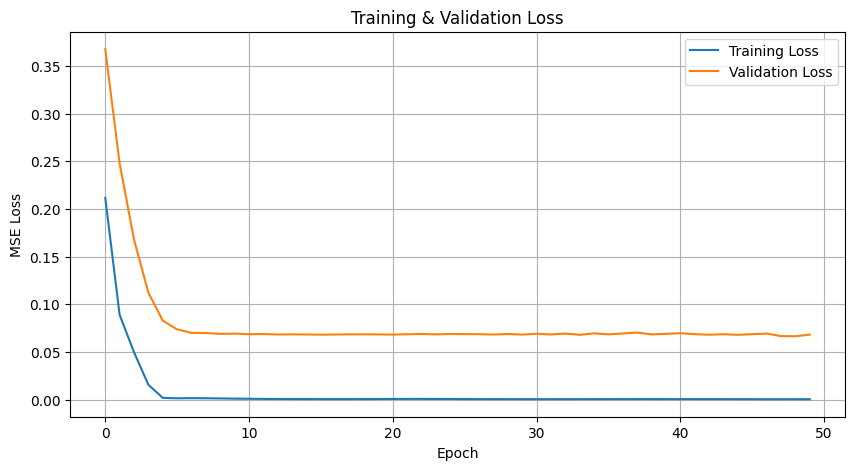

In [18]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
collab_model.create_interaction_matrix(interaction_data)

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 7152 stored elements and shape (5, 4000)>,
 {np.int64(1): 0,
  np.int64(2): 1,
  np.int64(3): 2,
  np.int64(4): 3,
  np.int64(5): 4},
 {'1': 0,
  '1001': 1,
  '1006': 2,
  '1007': 3,
  '1013': 4,
  '1016': 5,
  '1019': 6,
  '1030': 7,
  '1032': 8,
  '1035': 9,
  '1045': 10,
  '1051': 11,
  '1055': 12,
  '106': 13,
  '1062': 14,
  '1063': 15,
  '1064': 16,
  '1069': 17,
  '1070': 18,
  '1072': 19,
  '1078': 20,
  '1085': 21,
  '11': 22,
  '110': 23,
  '1100': 24,
  '1105': 25,
  '1113': 26,
  '1114': 27,
  '1119': 28,
  '112': 29,
  '1120': 30,
  '1122': 31,
  '1123': 32,
  '1125': 33,
  '1137': 34,
  '1138': 35,
  '1141': 36,
  '1145': 37,
  '1152': 38,
  '1162': 39,
  '1166': 40,
  '1170': 41,
  '1171': 42,
  '118': 43,
  '119': 44,
  '1193': 45,
  '12': 46,
  '1205': 47,
  '121': 48,
  '1211': 49,
  '1213': 50,
  '1215': 51,
  '122': 52,
  '1238': 53,
  '1242': 54,
  '1244': 55,
  '1245': 56,
  '1251': 57,
  '1254': 58,


In [21]:
user_id = 5  # ID user yang sudah di-encode (0 sampai num_users - 1)
article_id = 10  # ID artikel yang sudah di-encode (0 sampai num_articles - 1)

predicted_rating = collab_model.predict(user_id, article_id)
print(f"Predicted rating: {predicted_rating}")

Predicted rating: [0.14986226]


In [22]:
 # Get recommendations for a specific user
user_id = 1 # Replace with an actual user ID
recommendations = collab_model.recommend_for_user(
        user_id, 
        top_n=5, 
        articles_df=articles_enriched,
        exclude_seen=True,
        seen_interactions=interaction_data
    )

print(f"\nRecommendations for user {user_id}:")
recommendations[['title', 'province', 'city', 'score']]


Recommendations for user 1:


,title,province,city,score
0,Wrong nature great gas everybody thought perform.,North Dakota,North Kathleenland,0.815892
1,Her answer foreign number.,Tennessee,Jamieburgh,0.805016
2,By parent instead according.,Louisiana,Heidiburgh,0.798511
3,Conference two energy husband financial travel.,Texas,North Madisonside,0.794866
4,Since reduce benefit past morning step truth.,Kansas,New Elizabethberg,0.793239


In [23]:
 # Find similar articles to a specific article
article_id = '8'  # Replace with an actual article ID
similar_articles = collab_model.recommend_similar_articles(
        article_id,
        top_n=5,
        articles_df=articles_enriched
    )

In [24]:
similar_articles

,article_id,similarity,id,title,province,city
0,1524,0.824246,1524,Game he phone some around six language community.,West Virginia,Port Sydneyburgh
1,1693,0.821930,1693,Choice art space Republican off.,Oklahoma,New Joseph
2,3380,0.819600,3380,Figure recent buy attention special condition ...,Delaware,Rodriguezborough
3,1971,0.807515,1971,Well garden election far lose prepare either.,Tennessee,Lake Mary
4,1687,0.807404,1687,Medical more with start.,Minnesota,South Sean


In [25]:
print(f"\nArticles similar to '{articles_enriched[articles_enriched['id'] == article_id]['title'].values[0]}':")
similar_articles[['title', 'province', 'city', 'similarity']]


Articles similar to 'Free compare laugh would decision fear happy.':


,title,province,city,similarity
0,Game he phone some around six language community.,West Virginia,Port Sydneyburgh,0.824246
1,Choice art space Republican off.,Oklahoma,New Joseph,0.821930
2,Figure recent buy attention special condition ...,Delaware,Rodriguezborough,0.819600
3,Well garden election far lose prepare either.,Tennessee,Lake Mary,0.807515
4,Medical more with start.,Minnesota,South Sean,0.807404


In [26]:
collab_model.save_model()


C:\Users\MID-020\AppData\Local\Temp\ipykernel_16512\58933045.py:264: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  json.dump(float(self.global_bias), f)


True